In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Leave-one-out analysis

In [18]:
# load data
data = pd.read_csv('accuracy-leave-one-out.csv', parse_dates=True)
# append number of peaks
data.loc[data['season'].isin(['2014-2015', '2015-2016', '2017-2018', '2023-2024']), 'peaks'] = 'one'
data.loc[data['season'].isin(['2016-2017', '2018-2019', '2019-2020', '2017-2018']), 'peaks'] = 'multiple' # double counting 2017-2018 because it is an edge case
# groupby number of peaks
print(data.groupby(['model','informed', 'use_ED_visits'])['WIS'].mean())

model                informed  use_ED_visits
oneStrain            False     False            92.785074
                               True             84.994309
                     True      False            70.544760
                               True             72.074492
sequentialTwoStrain  False     False            93.919924
                               True             88.187725
                     True      False            72.611225
                               True             66.462569
Name: WIS, dtype: float64


## Incremental calibration 2023-2024

In [23]:
data = pd.read_csv('accuracy-training-x.csv', parse_dates=True).groupby(['model', 'training_horizon', 'use_ED_visits', 'season'])['WIS'].mean()

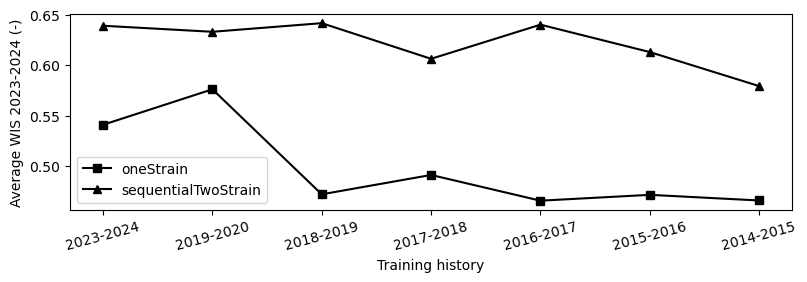

In [24]:
fig,ax=plt.subplots(figsize=(8.3, 11.7/4))
# oneStrain
ax.plot(data.index.get_level_values('training_horizon').unique(), data.loc['oneStrain'].values, marker='s', color='black', markersize=6, label='oneStrain')
# sequentialTwoStrain
ax.plot(data.index.get_level_values('training_horizon').unique(), data.loc['sequentialTwoStrain'].values, marker='^', color='black', markersize=6, label='sequentialTwoStrain')
# formatting
#ax.set_ylim([0.02, 0.07])
ax.set_xticks(data.index.get_level_values('training_horizon').unique())
ax.set_xticks(ax.get_xticks(), ['2023-2024', '2019-2020', '2018-2019', '2017-2018', '2016-2017', '2015-2016', '2014-2015'], rotation=15, ha='center')
ax.set_xlabel('Training history')
ax.set_ylabel('Average WIS 2023-2024 (-)')
ax.legend()
plt.tight_layout()
plt.show()
plt.close()